In [1]:
import tensorflow as tf
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
x_train.shape# 50000 data points each 32x32 pixels and density 3 for RGB

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

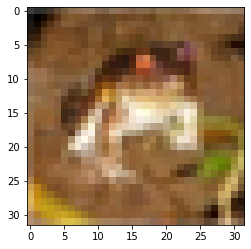

In [5]:
image=plt.imshow(x_train[0]) #shows the training data as an image

In [6]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [7]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [8]:
objects=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# one hot ecoding the data for y so it turns into a vector with a 1 in the appropriate place and zeros everywhere else.
y_train_one_hot= np_utils.to_categorical(y_train)
y_test_one_hot= np_utils.to_categorical(y_test)

In [9]:
print(y_train_one_hot[0]) #Should have a 1 in area column representing frog

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [10]:
x_train=x_train/255 #Normalise the data to be between 0 and 1
x_test =x_test/255


In [14]:
model=Sequential()

#making a convolutional network
model.add(Conv2D(32, (4,4), activation='relu', input_shape=(32, 32, 3))) # Makes 32 feature maps, the local receptive field is 4x4 pixels 
model.add(MaxPooling2D(pool_size=(2,2))) # Makes a pooling layer for every 2x2 neurons in feature maps into 1 neuron in pooling layer. Each feature map goes into different pooling sub layer
model.add(Conv2D( 32, (4,4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())# makes a linear 1d array for inputting into final set of fully connected layers
model.add(Dense(600, activation='relu')) #Dense layer is a fully connected layer
model.add(Dropout(0.5)) #Dropout to prevent overfitting to dataset
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))# 10 output neurons, 1 for each of the categories


In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history=model.fit(x_train, y_train_one_hot, batch_size=256, validation_data=(x_test, y_test_one_hot), epochs=20)

Epoch 1/20
196/196 [==============================] - 45s 226ms/step - loss: 1.7482 - accuracy: 0.3529 - val_loss: 1.3954 - val_accuracy: 0.4940
Epoch 2/20
196/196 [==============================] - 44s 222ms/step - loss: 1.3730 - accuracy: 0.5017 - val_loss: 1.2436 - val_accuracy: 0.5451
Epoch 3/20
196/196 [==============================] - 43s 219ms/step - loss: 1.2179 - accuracy: 0.5662 - val_loss: 1.1220 - val_accuracy: 0.6013
Epoch 4/20
196/196 [==============================] - 43s 219ms/step - loss: 1.1240 - accuracy: 0.6010 - val_loss: 1.0394 - val_accuracy: 0.6343
Epoch 5/20
196/196 [==============================] - 43s 219ms/step - loss: 1.0566 - accuracy: 0.6298 - val_loss: 1.1317 - val_accuracy: 0.6102
Epoch 6/20
196/196 [==============================] - 43s 220ms/step - loss: 0.9975 - accuracy: 0.6529 - val_loss: 0.9600 - val_accuracy: 0.6638
Epoch 7/20
196/196 [==============================] - 43s 220ms/step - loss: 0.9396 - accuracy: 0.6714 - val_loss: 0.9308 - val_ac

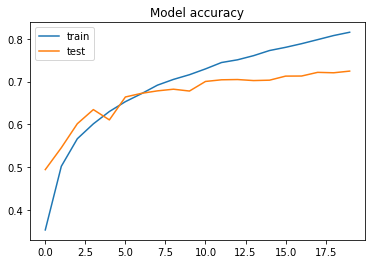

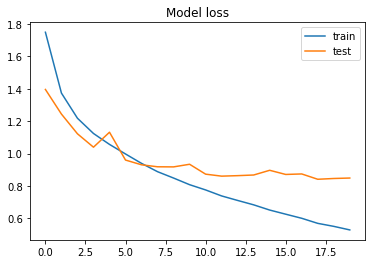

In [17]:
fig=plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) #The test data reaches an accuracy of 72% for model above. Running for more epochs this will get a bit higher.
plt.title('Model accuracy')
plt.xlabel='Epochs'
plt.ylabel='Accuracy'
plt.legend(('train', 'test'))

#This second figure plots the cost of the model against number of epochs
fig2=plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel='Epochs'
plt.ylabel='Cost'
plt.legend(('train', 'test'))





In [18]:
from google.colab import files #If you want to check your own image with the network
uploaded=files.upload() 

Saving airplane.jpg to airplane.jpg


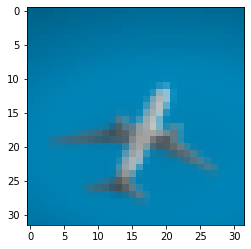

In [19]:
img=plt.imread('airplane.jpg') #truck.jpg should be replaced with the name of the image you want to check
from skimage.transform import resize
resized_image=resize(img, (32, 32, 3))
imfinal=plt.imshow(resized_image)


In [ ]:
'''If you want to check an image in the data set:
print(model.predict(x[a])) where a refers to the index of the corresponding 
image in the dataset


In [20]:
#print(resized_image)
print(np.array([resized_image]))
np.array([resized_image]).shape


[[[[0.         0.38039216 0.53333333]
   [0.         0.38431373 0.5372549 ]
   [0.         0.38823529 0.54117647]
   ...
   [0.         0.41176471 0.57254902]
   [0.         0.41176471 0.56979933]
   [0.         0.40784314 0.56862745]]

  [[0.         0.38823529 0.54901961]
   [0.         0.39215686 0.54901961]
   [0.         0.39607843 0.55294118]
   ...
   [0.         0.42352941 0.59215686]
   [0.         0.42203585 0.58823529]
   [0.         0.41960784 0.58431373]]

  [[0.         0.4        0.56078431]
   [0.         0.40392157 0.56223192]
   [0.         0.40392157 0.56711857]
   ...
   [0.         0.43529412 0.60784314]
   [0.         0.43525582 0.60392157]
   [0.         0.43137255 0.6       ]]

  ...

  [[0.         0.47058824 0.65882353]
   [0.         0.4745098  0.6627451 ]
   [0.         0.47843137 0.67058824]
   ...
   [0.         0.51372549 0.71764706]
   [0.         0.51372549 0.71764706]
   [0.         0.51372549 0.71372549]]

  [[0.         0.4627451  0.65098039]
   [0. 

(1, 32, 32, 3)

In [21]:
prediction=model.predict(np.array([resized_image]))

In [22]:
print(prediction)

[[8.1227404e-01 1.4570883e-05 3.3097584e-02 1.0155115e-02 5.0873072e-03
  3.5053941e-05 8.7233326e-05 4.7733320e-05 1.3907686e-01 1.2462893e-04]]


In [23]:
#The code below finds the probability that the image is any of the objects given and 
vals=[]
pairs={}
for i in range(10):
  print('probability of ', objects[i])
  print('is:' ,prediction[0][i])
  print('\n')
  vals.append(prediction[0][i])
  pairs[prediction[0][i]]=objects[i]




vals.sort()
vals.reverse()
print('In decreasing order of likelihood the top 3 are: ')
print(pairs[vals[0]])
print(pairs[vals[1]])
print(pairs[vals[2]])

probability of  airplane
is: 0.81227404


probability of  automobile
is: 1.4570883e-05


probability of  bird
is: 0.033097584


probability of  cat
is: 0.010155115


probability of  deer
is: 0.005087307


probability of  dog
is: 3.505394e-05


probability of  frog
is: 8.7233326e-05


probability of  horse
is: 4.773332e-05


probability of  ship
is: 0.13907686


probability of  truck
is: 0.00012462893


In decreasing order of likelihood the top 3 are: 
airplane
ship
bird
